In [1]:
import tensorflow as tf 
import tensorflow_probability as tf
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import shutil
from glob import glob
from sklearn.model_selection import train_test_split


2023-12-04 05:49:10.228062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df=pd.read_csv('list_attr_celeba.csv').drop(columns=['image_id'],index=np.linspace(50000, 202598, num=202598-50000+1))

In [3]:
df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [4]:
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

Al final si se logró corregir el problema de las imagenes ajustando el rango en df

In [5]:
n_imagen = sorted(glob(os.path.join("img_align_celeba", "*"))[50000:59000])

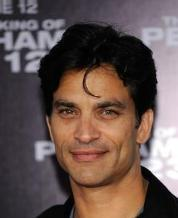

In [6]:
Image.open(n_imagen[149])

In [8]:
data.shape

(50000, 218, 178, 3)

In [11]:
dfff.shape

(40000, 40)

In [7]:
data = np.zeros((50000, 218, 178, 3), dtype="uint8")  # Crear el arreglo con capacidad para 50000 elementos
count = 0

for f in n_imagen:  # Iterar sobre todas las rutas de imagen en 'n_imagen'
    if count == 50000:  # Detener el bucle después de 50000 iteraciones
        break
    
    try:
        img = Image.open(f)
        data[count] = np.array(img)
        count += 1
    except:
        print(f"Error con imagen: {count}")
        continue

In [12]:

datax, data_test, dfx, df_test = train_test_split(data, df, test_size=0.2, random_state=42)

Sino se ejecutaba el siguiente bloque,no quedaban otra vez de tamaños compatibles:

In [10]:
tdf=len(df)
dff = int(tdf * 0.80) 
dfff = df.sample(n=dff, random_state=42)

In [14]:
df_test.shape

(10000, 40)

In [13]:
datax.shape

(40000, 218, 178, 3)

In [19]:
datax_train = datax.astype('float32')
dataxx_valid = data_test.astype('float32')
datax_train /= 255.
dataxx_valid /= 255.
df_train = dfff
df_valid = df_test

In [20]:
#Para nuestro modelo vamos a usar la técnica Transder learning que luce como
inp = (218,178,3)

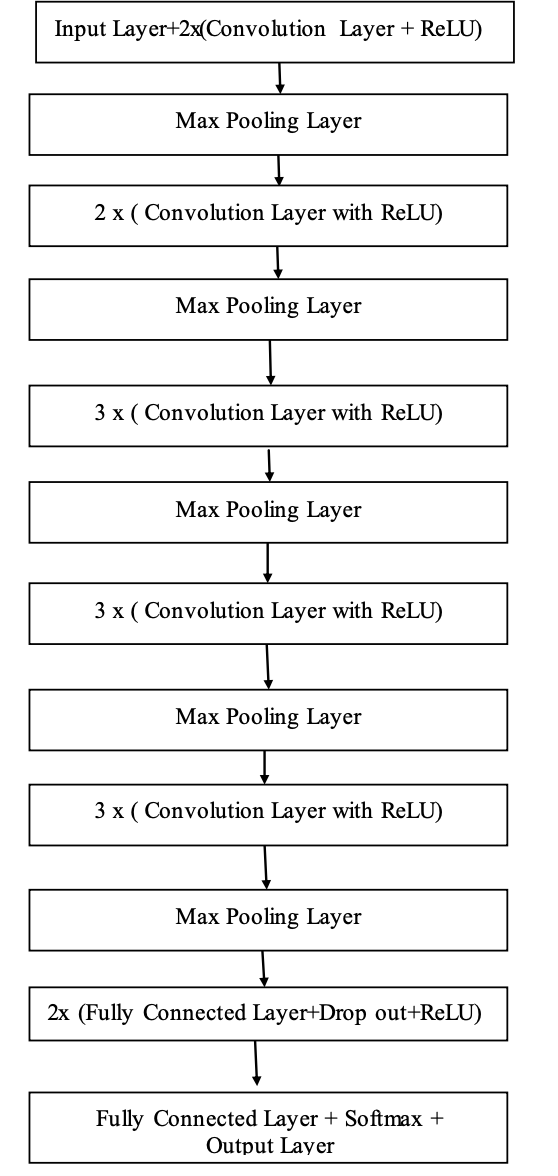

In [21]:
model= Sequential()


#Bloque 1
model.add(Conv2D(10, (3,3) ,input_shape=inp ))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Bloque 2
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Bloque 3
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Bloque 4
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(10, (3,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Bloque final 
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(40))
model.add(Activation('softmax'))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 216, 176, 10)      280       
                                                                 
 activation_12 (Activation)  (None, 216, 176, 10)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 214, 174, 10)      910       
                                                                 
 activation_13 (Activation)  (None, 214, 174, 10)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 107, 87, 10)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 105, 85, 10)       910       
                                                      

In [23]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))
history = model.fit(datax_train, df_train, batch_size=35,epochs=5, validation_data=(dataxx_valid, df_valid))

Epoch 1/5
1143/1143 [==============================] - 1007s 879ms/step - loss: 0.9829 - val_loss: 0.9818
Epoch 2/5
1143/1143 [==============================] - 959s 839ms/step - loss: 0.9816 - val_loss: 0.9818
Epoch 3/5
1143/1143 [==============================] - 1042s 912ms/step - loss: 0.9816 - val_loss: 0.9818
Epoch 4/5
 726/1143 [==================>...........] - ETA: 5:06 - loss: 0.9815

In [24]:
model.save('my_model.h5')

se tardó un montón en ejecutar las épocas